Make sure you open it in google colab to see all diagrams:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dory7137/Visiting-home-project/blob/main/COVID19_project/covid_data_analysis.ipynb)

This jupyter notebook file contains the documentation of the code, show all de analysis and result and explicitly testing the code itself as runing all codeparts.

For this project I used the "JHU CSSE COVID-19 Data" url: https://github.com/CSSEGISandData/COVID-19, 
and these articles and code parts from towardsdatascience.com: 
https://towardsdatascience.com/infectious-disease-modelling-part-i-understanding-sir-28d60e29fdfc
https://towardsdatascience.com/infectious-disease-modelling-beyond-the-basic-sir-model-216369c584c4
https://towardsdatascience.com/infectious-disease-modelling-fit-your-model-to-coronavirus-data-2568e672dbc7


First, import all necessary libraries

In [144]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#%matplotlib inline 
#import mpld3
#mpld3.enable_notebook()
from scipy.integrate import odeint
!pip install lmfit
import lmfit
from lmfit.lineshapes import gaussian, lorentzian
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')

Read the data to a pandas dataframe from the .CSV files from the JHU CSSE COVID-19 github repository using pandas library.

Printing out these dataframes first few rows to test the file reading.

In [145]:
confirmed_cases=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
deaths_cases=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered_cases=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [146]:
confirmed_cases.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  11/14/20  11/15/20  11/16/20  \
0        0        0        0        0  ...     43035     43240     43403   
1        0        0        0        0  ...     27233     27830     28432   
2        0        0        0        0  ...     66819     67679     68589   
3        0        0        0        0  ...      5725      5872      5914   
4        0        0        0        0  ...     13374     13451     13615   

   11/17/20  11/18/20  11/19/20  11/20/20  11/21/20  11/22/20  11/23/20  
0     43628     43851     44228     44443     44503     44706     44988  
1     29126     29837     30623     31459     32196     32761     33556  
2     69591     70629     71652     72755     73774     74862     75867  
3      5951      6018      6066      6142      6207      6256      6304  
4     13818     13922     14134     14267     14413     14493     14634  

[5 rows x 311 columns]

In [147]:
deaths_cases.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  11/14/20  11/15/20  11/16/20  \
0        0        0        0        0  ...      1605      1617      1626   
1        0        0        0        0  ...       612       623       631   
2        0        0        0        0  ...      2139      2154      2168   
3        0        0        0        0  ...        75        76        76   
4        0        0        0        0  ...       322       322       324   

   11/17/20  11/18/20  11/19/20  11/20/20  11/21/20  11/22/20  11/23/20  
0      1638      1645      1650      1661      1675      1687      1695  
1       637       646       657       672       685       699       716  
2      2186      2206      2224      2236      2255      2272      2294  
3        76        76        76        76        76        76        76  
4       328       332       333       334       336       337       337  

[5 rows x 311 columns]

In [148]:
recovered_cases.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  11/14/20  11/15/20  11/16/20  \
0        0        0        0        0  ...     35067     35092     35137   
1        0        0        0        0  ...     12767     12889     13453   
2        0        0        0        0  ...     44199     44633     45148   
3        0        0        0        0  ...      4675      4747      4830   
4        0        0        0        0  ...      6345      6444      6523   

   11/17/20  11/18/20  11/19/20  11/20/20  11/21/20  11/22/20  11/23/20  
0     35160     35295     35350     35370     35422     35934     35976  
1     13804     14216     14565     15055     15469     15842     16230  
2     45148     46326     46962     47581     48183     48794     49421  
3      4965      5055      5127      5239      5290      5358      5405  
4      6582      6623      7062      7117      7273      7346      7351  

[5 rows x 311 columns]

Choosing the hungarian and irish data

In [149]:
confirmed_ie_hu=confirmed_cases[(confirmed_cases["Country/Region"]=="Ireland") | (confirmed_cases["Country/Region"]=="Hungary") ].reset_index(drop=True)
deaths_ie_hu=deaths_cases[(deaths_cases["Country/Region"]=="Ireland") | (deaths_cases["Country/Region"]=="Hungary") ].reset_index(drop=True)
recovered_ie_hu=recovered_cases[(recovered_cases["Country/Region"]=="Ireland") | (recovered_cases["Country/Region"]=="Hungary") ].reset_index(drop=True)

Delete the columns that I won't use for this analysis

In [150]:
del confirmed_ie_hu["Province/State"]
del confirmed_ie_hu["Lat"]
del confirmed_ie_hu["Long"]

del deaths_ie_hu["Province/State"]
del deaths_ie_hu["Lat"]
del deaths_ie_hu["Long"]

del recovered_ie_hu["Province/State"]
del recovered_ie_hu["Lat"]
del recovered_ie_hu["Long"]

Pivoting the tables. It makes the visualisation part easier. 
Print out the last part of the data to test the pivoting.

In [151]:
confirmed_ie_hu=confirmed_ie_hu.pivot_table(columns=["Country/Region"]).reset_index()
confirmed_ie_hu.rename(columns = {'index': "Date", "Hungary": "Hungary_C", "Ireland": "Ireland_C"}, inplace=True)
confirmed_ie_hu['Date']=pd.to_datetime(confirmed_ie_hu['Date'],format='%m/%d/%y') 
confirmed_ie_hu.sort_values(by= 'Date').reset_index(inplace=True)
confirmed_ie_hu.tail()

Country/Region       Date  Hungary_C  Ireland_C
302            2020-09-05       7892      29534
303            2020-09-06       8387      29672
304            2020-09-07       8963      29774
305            2020-09-08       9304      30080
306            2020-09-09       9715      30164

In [152]:
deaths_ie_hu=deaths_ie_hu.pivot_table(columns=["Country/Region"]).reset_index(drop=False)
deaths_ie_hu.rename(columns = {'index': "Date", "Hungary": "Hungary_D", "Ireland": "Ireland_D"}, inplace=True)
deaths_ie_hu['Date']=pd.to_datetime(deaths_ie_hu['Date'],format='%m/%d/%y') 
deaths_ie_hu=deaths_ie_hu.sort_values(by= 'Date')
deaths_ie_hu.set_index("Date", inplace = True)
confirmed_ie_hu.tail()

Country/Region       Date  Hungary_C  Ireland_C
302            2020-09-05       7892      29534
303            2020-09-06       8387      29672
304            2020-09-07       8963      29774
305            2020-09-08       9304      30080
306            2020-09-09       9715      30164

In [153]:
recovered_ie_hu=recovered_ie_hu.pivot_table(columns=["Country/Region"]).reset_index(drop=False)
recovered_ie_hu.rename(columns = {'index': "Date", "Hungary": "Hungary_R", "Ireland": "Ireland_R"}, inplace=True)
recovered_ie_hu['Date']=pd.to_datetime(recovered_ie_hu['Date'],format='%m/%d/%y') 
recovered_ie_hu=recovered_ie_hu.sort_values(by= 'Date')
recovered_ie_hu.set_index("Date",  inplace=True)
recovered_ie_hu.tail()

Country/Region  Hungary_R  Ireland_R
Date                                
2020-11-19          36345      23364
2020-11-20          38074      23364
2020-11-21          40820      23364
2020-11-22          42915      23364
2020-11-23          43339      23364

Merge the three tables into one table. 

In [154]:
all_data=pd.merge(confirmed_ie_hu,deaths_ie_hu, left_on="Date",right_on="Date").merge(recovered_ie_hu, left_on="Date",right_on="Date")
all_data=all_data.sort_values(by="Date", ignore_index=True).reset_index(drop=True)


Add a new column for the active cases which is the difference between all confirmed cases and the number of the deaths and recovered cases.
Print out the last 10 lines to test the calculation.

In [155]:
all_data["Hungary_A"]=all_data["Hungary_C"]-all_data["Hungary_D"]-all_data["Hungary_R"]
all_data["Ireland_A"]=all_data["Ireland_C"]-all_data["Ireland_D"]-all_data["Ireland_R"]
all_data.tail(10)

Country/Region       Date  Hungary_C  Ireland_C  Hungary_D  Ireland_D  \
297            2020-11-14     136723      67526       2990       1978   
298            2020-11-15     140961      67903       3097       1979   
299            2020-11-16     147456      68356       3190       1984   
300            2020-11-17     152659      68686       3281       1995   
301            2020-11-18     156949      69058       3380       2006   
302            2020-11-19     161461      69473       3472       2010   
303            2020-11-20     165901      69802       3568       2018   
304            2020-11-21     170298      70143       3689       2022   
305            2020-11-22     174618      70461       3800       2023   
306            2020-11-23     177952      70711       3891       2023   

Country/Region  Hungary_R  Ireland_R  Hungary_A  Ireland_A  
297                 31126      23364     102607      42184  
298                 31599      23364     106265      42560  
299                 34010      23364     110256      43008  
300                 34185      23364     115193      43327  
301                 34846      23364     118723      43688  
302                 36345      23364     121644      44099  
303                 38074      23364     124259      44420  
304                 40820      23364     125789      44757  
305                 42915      23364     127903      45074  
306                 43339      23364     130722      45324

Because the EU Green list definition uses a ratio for 100.000 inhabitants, I calculate this for Hungary and Ireland too.

In [156]:
hungarian_rate=100000/9773000
irish_rate=100000/4953000

To visualize the data of this two countries define a function named data_plotter.

In [157]:
def data_plotter(plt_type, splot_size, xaxis_data, first_dataset, second_dataset, fig_title, fig_ylabel, fig_legend):
    
    if plt_type == "cumulate":
        plt.subplot(splot_size[0], splot_size[1], splot_size[2])
        plt.plot(xaxis_data,first_dataset)
        plt.plot(xaxis_data,second_dataset)
        plt.xticks(rotation=45)
        plt.title(fig_title)
        plt.ylabel(fig_ylabel)
        plt.legend(fig_legend)
        plt.grid(b=True, alpha=0.5)
        #for 100.000 habitants
        plt.subplot(splot_size[0], splot_size[1], splot_size[2]+1)
        plt.plot(xaxis_data,first_dataset*hungarian_rate)
        plt.plot(xaxis_data,second_dataset*irish_rate)
        plt.xticks(rotation=45)
        plt.title(fig_title+" for 100.000 inhabitants")
        plt.ylabel(fig_ylabel)
        plt.legend(fig_legend)
        plt.grid(b=True, alpha=0.2)
    
    elif plt_type == "daily":
        plt.subplot(splot_size[0], splot_size[1], splot_size[2])
        plt.bar(xaxis_data, first_dataset, width=0.5)
        plt.bar(xaxis_data + pd.Timedelta(hours=12), second_dataset, width=0.5)
        plt.title(fig_title)
        plt.ylabel(fig_ylabel)
        plt.legend(fig_legend)
        plt.grid(b=True, alpha=0.5)
        plt.xticks(rotation=45)
        plt.ylim( ymin = 0)
    else:
        #TODO: raise error
        pass

Plotting the figures. The first figure represent all cases and all active cases, and these cases for 100.000 inhabitants

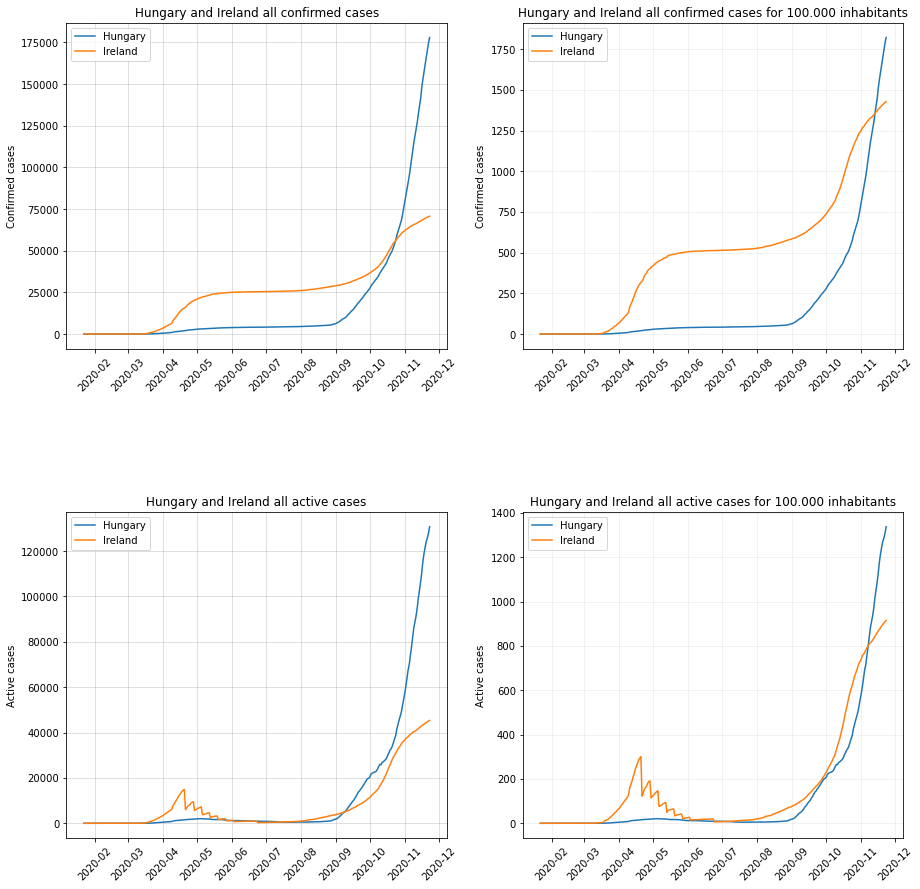

In [158]:
figure=plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#first plot
#confirmed cases
data_plotter("cumulate",[2,2,1],all_data.Date, all_data.Hungary_C, all_data.Ireland_C, "Hungary and Ireland all confirmed cases", "Confirmed cases", ["Hungary", "Ireland"] )
#active cases
data_plotter("cumulate",[2,2,3],all_data.Date, all_data.Hungary_A, all_data.Ireland_A, "Hungary and Ireland all active cases", "Active cases", ["Hungary", "Ireland"] )
plt.show()

It's interesting that if we look at the total number of cases, there are currently more confirmed and active cases in Hungary.
However, if we look the cases for 100.000 inhabitants, it seems that the difference is smaller, in fact, before November the hungarian cases for 100.000 inhabitants were smaller than irish cases. The latter finding is also true for active cases.

However, it is important to note that since the number of tests and the rate of positive tests in Hungary and in Ireland are very different, it is not possible to say  anything with absolute certainty.

Next plots are for the deaths and recovered.

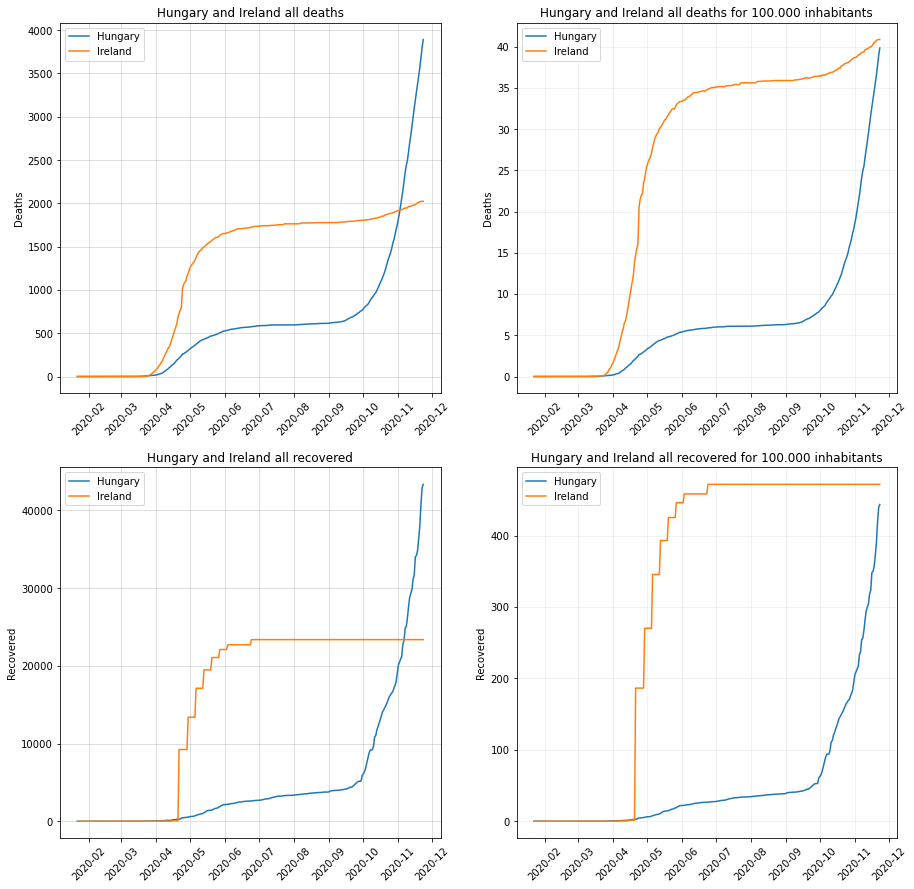

In [164]:
#plot2
figure2=plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.2, hspace=0.2)
#deaths
data_plotter("cumulate",[2,2,1],all_data.Date, all_data.Hungary_D, all_data.Ireland_D, "Hungary and Ireland all deaths", "Deaths", ["Hungary", "Ireland"] )
#recovered
data_plotter("cumulate",[2,2,3],all_data.Date, all_data.Hungary_R, all_data.Ireland_R, "Hungary and Ireland all recovered", "Recovered", ["Hungary", "Ireland"] )
plt.show()

The above findings are again true on the basis of the figures, if we look at the left side, we can see that the cumalted numbers are higher in Hungary but if we look at the right side, Ireland has the higher number of deaths and recovered for 100.000 inhabitants. 
In summary, the two figures above show that numbers in Ireland were worse in terms of population, but Hungary is catching up as both the number of active, infected people and deaths are growing exponentially.


Next step is to calculate the daily dataset for the confirmed,deaths, recoveered and active cases. It helps to see the changes in trends.

In [165]:
#calculate daily data

daily_confirmed_hun =[]
daily_confirmed_ie=[]
daily_deaths_hun=[]
daily_deaths_ie=[]
daily_recovered_hun=[]
daily_recovered_ie=[]
daily_active_hun=[]
daily_active_ie=[]

# choose the data for figures

for i in range(len(all_data[["Hungary_C"]])):
    if i == 0:
        daily_confirmed_hun.append(all_data[["Hungary_C"]].iat[i,0])
        daily_confirmed_ie.append(all_data[["Ireland_C"]].iat[i, 0])
        daily_deaths_hun.append(all_data[["Hungary_D"]].iat[i, 0])
        daily_deaths_ie.append(all_data[["Ireland_D"]].iat[i, 0])
        daily_recovered_hun.append(all_data[["Hungary_R"]].iat[i, 0])
        daily_recovered_ie.append(all_data[["Ireland_R"]].iat[i, 0])
        daily_active_hun.append(all_data[["Hungary_C"]].iat[i, 0]-all_data[["Hungary_D"]].iat[i, 0]-all_data[["Hungary_R"]].iat[i, 0])
        daily_active_ie.append(all_data[["Ireland_C"]].iat[i, 0]-all_data[["Ireland_D"]].iat[i, 0]-all_data[["Ireland_R"]].iat[i, 0])

    else:
        daily_confirmed_hun.append(all_data[["Hungary_C"]].iat[i, 0] - all_data[["Hungary_C"]].iat[i-1,0])
        daily_confirmed_ie.append(all_data[["Ireland_C"]].iat[i, 0] - all_data[["Ireland_C"]].iat[i-1,0])
        daily_deaths_hun.append(all_data[["Hungary_D"]].iat[i, 0] - all_data[["Hungary_D"]].iat[i-1,0])
        daily_deaths_ie.append(all_data[["Ireland_D"]].iat[i, 0] - all_data[["Ireland_D"]].iat[i-1,0])
        daily_recovered_hun.append(all_data[["Hungary_R"]].iat[i, 0] - all_data[["Hungary_R"]].iat[i-1,0])
        daily_recovered_ie.append(all_data[["Ireland_R"]].iat[i, 0] - all_data[["Ireland_R"]].iat[i-1,0])
        hu_act=(all_data[["Hungary_C"]].iat[i, 0] - all_data[["Hungary_C"]].iat[i-1,0])-(all_data[["Hungary_D"]].iat[i, 0] - all_data[["Hungary_D"]].iat[i-1,0])- (all_data[["Hungary_R"]].iat[i, 0] - all_data[["Hungary_R"]].iat[i-1,0])
        ie_act=(all_data[["Ireland_C"]].iat[i, 0] - all_data[["Ireland_C"]].iat[i-1,0])-(all_data[["Ireland_D"]].iat[i, 0] - all_data[["Ireland_D"]].iat[i-1,0])- (all_data[["Ireland_R"]].iat[i, 0] - all_data[["Ireland_R"]].iat[i-1,0])
        daily_active_hun.append(hu_act)
        daily_active_ie.append(ie_act)


After that, I can visualize the daily cases too. 

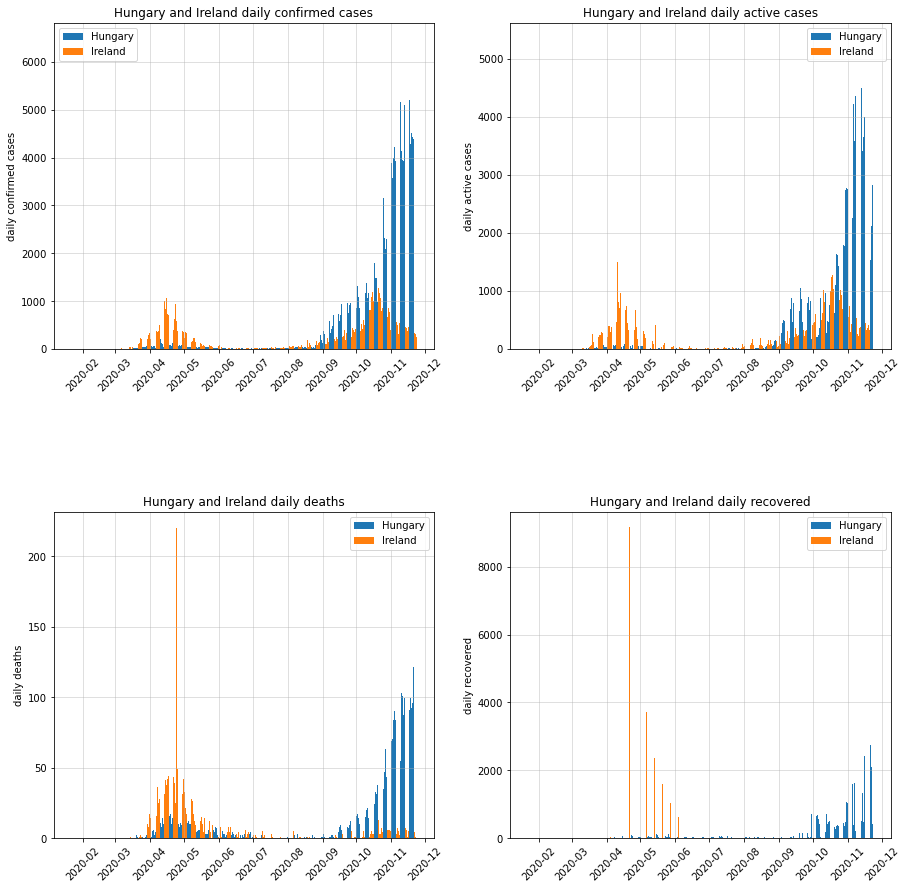

In [170]:
figure3=plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.2, hspace=0.5)

data_plotter("daily",[2,2,1],all_data.Date, daily_confirmed_hun, daily_confirmed_ie, "Hungary and Ireland daily confirmed cases", "daily confirmed cases", ["Hungary", "Ireland"] )
data_plotter("daily",[2,2,2],all_data.Date, daily_active_hun, daily_active_ie, "Hungary and Ireland daily active cases", "daily active cases", ["Hungary", "Ireland"] )
data_plotter("daily",[2,2,3],all_data.Date, daily_deaths_hun, daily_deaths_ie, "Hungary and Ireland daily deaths", "daily deaths", ["Hungary", "Ireland"] )
data_plotter("daily",[2,2,4],all_data.Date, daily_recovered_hun, daily_recovered_ie, "Hungary and Ireland daily recovered", "daily recovered", ["Hungary", "Ireland"] )
plt.show()

The figure shows that the first and second waves are clearly separated for both countries. It can also be seen that while in the first wave there were more daily cases in Ireland, in the second wave Hungary has more new and active cases and more deaths.

And now, let's see the daily cases for 100.000 inhabitants.

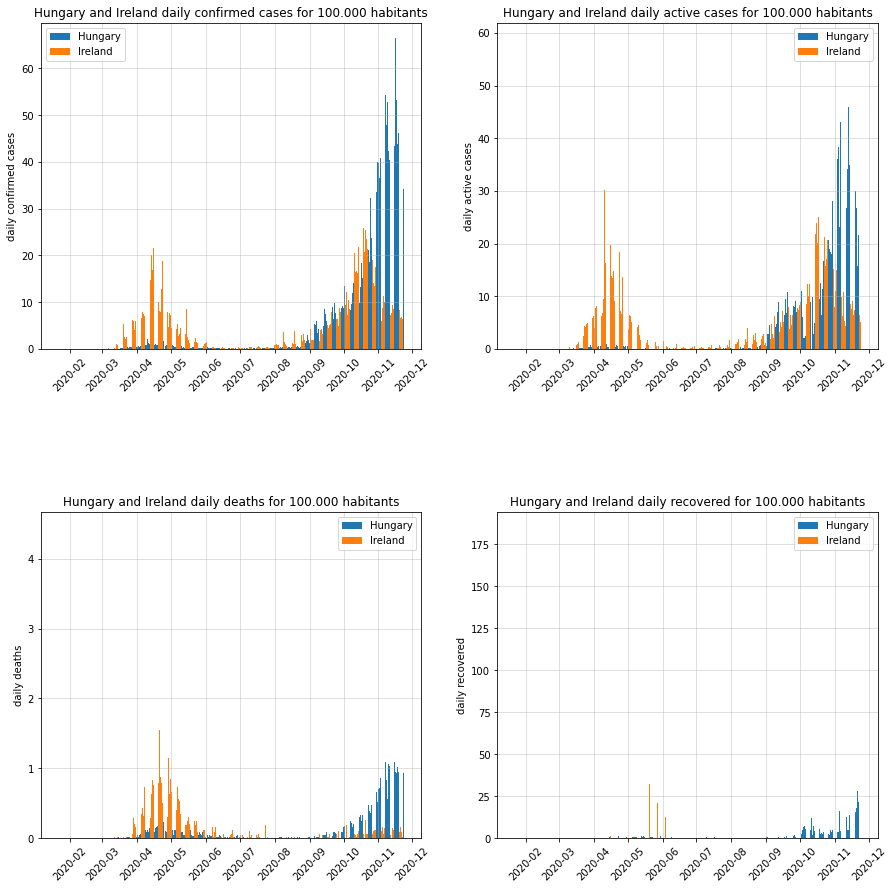

In [172]:
daily_confirmed_hun_100K = [case*hungarian_rate for case in daily_confirmed_hun]
daily_confirmed_ie_100K = [case*irish_rate for case in daily_confirmed_ie]
daily_deaths_hun_100K = [case*hungarian_rate for case in daily_deaths_hun]
daily_deaths_ie_100K = [case*irish_rate for case in daily_deaths_ie]
daily_recovered_hun_100K = [case*hungarian_rate for case in daily_recovered_hun]
daily_recovered_ie_100K = [case*irish_rate for case in daily_recovered_ie]
daily_active_hun_100K = [case*hungarian_rate for case in daily_active_hun]
daily_active_ie_100K = [case*irish_rate for case in daily_active_ie]

figure4=plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.2, hspace=0.5)

data_plotter("daily",[2,2,1],all_data.Date, daily_confirmed_hun_100K, daily_confirmed_ie_100K, "Hungary and Ireland daily confirmed cases for 100.000 habitants", "daily confirmed cases", ["Hungary", "Ireland"] )
data_plotter("daily",[2,2,2],all_data.Date, daily_active_hun_100K, daily_active_ie_100K, "Hungary and Ireland daily active cases for 100.000 habitants", "daily active cases", ["Hungary", "Ireland"] )
data_plotter("daily",[2,2,3],all_data.Date, daily_deaths_hun_100K, daily_deaths_ie_100K, "Hungary and Ireland daily deaths for 100.000 habitants", "daily deaths", ["Hungary", "Ireland"] )
data_plotter("daily",[2,2,4],all_data.Date, daily_recovered_hun_100K, daily_recovered_ie_100K, "Hungary and Ireland daily recovered for 100.000 habitants", "daily recovered", ["Hungary", "Ireland"] )
plt.show()


The data for 100,000 inhabitants looks more nuanced, but the previously mentioned trend remained, the first wave affected Ireland more, and it changed in the second wave.

After I get familiar with the data, it's time to write the SIR model and use that to predict the future.
If you are not familiar with the concept of SIR model please read the linked articles above from towardsdatascilence.com.
I decided to use a basic SIR (not SEIR or  SEICR model) because I want to predict the Inflected numbers and the basic model is perfect for this and I can't find any public dataset about the occupied ICU beds and invasive ventillators. 

In [173]:
# gamma: how many days takes to recover
gamma = 1.0/9.0
# phi how many days takes to die
phi = 1.0/18.0
# alpha is the fatality rate
alpha=2.3/10.0
#population number
N_hungary=9700000
N_ireland=4700000
hungarian_green_list_limit=25.0 / hungarian_rate
irish_green_list_limit=25.0 / irish_rate

In [184]:
def data_fitting_SIR(country,N_country, green_list_limit, data_to_fit, outbreak_day, params_to_fit):
    #calculate the derivate of the SIR model elements (or the difference over time)
    def deriv(y, t, beta, gamma, phi, alpha, N):
        S, I, R, D = y
        dSdt = -beta(t) * I * S / N
        dIdt = beta(t) * I * S/N - (gamma*(1-alpha)*I) - (phi*alpha*I)
        dRdt = gamma * alpha * I
        dDdt = phi * (1-alpha)*I
        return dSdt, dIdt,  dRdt, dDdt
    # the inflection rate called R in this case modelling the changes over time like a logistic function
    def logistic_R_0(t, R_0_start, k, x0, R_0_end):
        return (R_0_start-R_0_end) / (1 + np.exp(-k*(-t+x0))) + R_0_end
    
    # the SIR model 
    def Model(days, N, R_0_start, k, x0, R_0_end):
        
        def beta(t):
            return logistic_R_0(t, R_0_start, k, x0, R_0_end) * gamma

        y0 = N-1.0, 1.0, 0.0, 0.0
        t = np.linspace(0, days-1, days)
        ret = odeint(deriv, y0, t, args=(beta, gamma, phi, alpha, N ))
        S, I, R, D = ret.T
        R_0_over_time = [beta(i)/gamma for i in range(len(t))]

        return t, S, I, R, D, R_0_over_time
    
    
    #use to plot the prediction
    def plotter(t, S, I, R, D, R_0, x_ticks=None, country=""):
    
        f, ax = plt.subplots(1,1,figsize=(10,10))
        if x_ticks is None:
            ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
        else:
            ax.plot(x_ticks, I, 'r', alpha=0.7, linewidth=2, label='Infected')
            ax.xaxis.set_major_locator(mdates.YearLocator())
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
            ax.xaxis.set_minor_locator(mdates.MonthLocator())
            f.autofmt_xdate()
        ax.title.set_text('The SIR-Model prediction of '+ country)
        ax.grid(b=True, alpha=0.5)
        legend = ax.legend()
        legend.get_frame().set_alpha(0.5)
        for spine in ('top', 'right', 'bottom', 'left'):
            ax.spines[spine].set_visible(False)
        plt.show()
        
        
    #fitting the model to the actual data 
    def fitter(x, R_0_start, k, x0, R_0_end):
        #Model(days, N, R_0_start, k, x0, R_0_end)
        ret = Model(days, N_country, R_0_start, k, x0, R_0_end)
        # index=2 -> returns I
        return ret[2][x]

    fitting_data = data_to_fit
    
    outbreak_shift = outbreak_day
    #form: {parameter: (initial guess, minimum value, max value)}
    params_init_min_max = params_to_fit  
    #if the outbreak was before the first dataset (01.22.2020)
    days = outbreak_shift + len(fitting_data)
    if outbreak_shift >= 0:
        y_data = np.concatenate((np.zeros(outbreak_shift), fitting_data))
    else:
        y_data = y_data[-outbreak_shift:]

    x_data = np.linspace(0, days - 1, days, dtype=int)  # x_data is just [0, 1, ..., max_days] array
    
    #try to find the best values to the paramteters works regression
    mod = lmfit.Model(fitter)

    for kwarg, (init, mini, maxi) in params_init_min_max.items():
        mod.set_param_hint(str(kwarg), value=init, min=mini, max=maxi, vary=True)

    params = mod.make_params()
    fit_method = "leastsq"

    result = mod.fit(y_data, params, method="least_squares", x=x_data)
    
    result.plot_fit(datafmt="-")
    plt.title("Fitting the model to {}'s data".format(country))
    plt.grid(b=True, alpha=0.5)
    plt.show()

    full_days = 650
    first_date = np.datetime64(all_data.Date.min()) - np.timedelta64(outbreak_shift,'D')
    x_ticks = pd.date_range(start=first_date, periods=full_days, freq="D")

    plotter(*Model(full_days, N_country, **result.best_values), x_ticks=x_ticks, country=country)

    prediction_country = Model(full_days, N_country, **result.best_values)
    active_cases_pred=prediction_country[2]

    #calculate the daily new cases
    daily_prediction_country=[]

    for i in range(len(active_cases_pred)):
        if i == 0:
            daily_prediction_country.append(active_cases_pred[i])
        else:
            daily_prediction_country.append(active_cases_pred[i]-active_cases_pred[i-1])

    

    #calculate the "green list point"
    count=daily_prediction_country.index(max(daily_prediction_country)) #after max

    #find the first element that is above of the limit after the peak
    while(daily_prediction_country[count] > green_list_limit and count <= len(daily_prediction_country)):
        count+=1

    green_list_limit_index=count

    figure_prob=plt.figure(figsize=(15,15))
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    ax_prob=plt.subplot(2,1,1)
    plt.hlines(y = green_list_limit, xmin = x_ticks[0], xmax = x_ticks[-2], color='g')
    plt.bar(x_ticks, daily_prediction_country, width=0.5)
    plt.title("{} predicted daily new cases".format(country))
    plt.ylabel("daily new cases")
    ax_prob.xaxis.set_major_locator(mdates.MonthLocator())
    ax_prob.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax_prob.xaxis.set_minor_locator(mdates.MonthLocator())
    figure_prob.autofmt_xdate()
    plt.grid(b=True, alpha=0.5)
    plt.xticks(rotation=45)
    plt.ylim( ymin = 0)
    plt.xlim(x_ticks[40], x_ticks[500])

    ##zoom in
    
    ax_zoom=plt.subplot(2,1,2)
    plt.hlines(y = green_list_limit, xmin = x_ticks[0], xmax = x_ticks[-2], color='g')
    plt.bar(x_ticks, daily_prediction_country, width=0.5)
    plt.title("{} predicted daily inflected cases".format(country))
    plt.ylabel("daily inflected cases")
    ax_zoom.xaxis.set_major_locator(mdates.DayLocator())
    ax_zoom.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.grid(b=True, alpha=0.5)
    plt.xticks(rotation=45)
    plt.ylim( ymin = 0, ymax=green_list_limit+500)
    plt.xlim(x_ticks[green_list_limit_index-3], x_ticks[green_list_limit_index+10])
    plt.show()


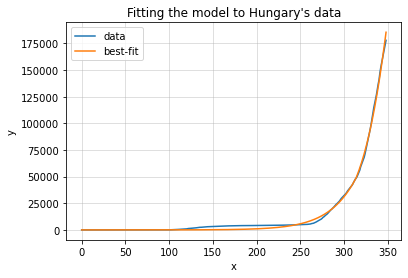

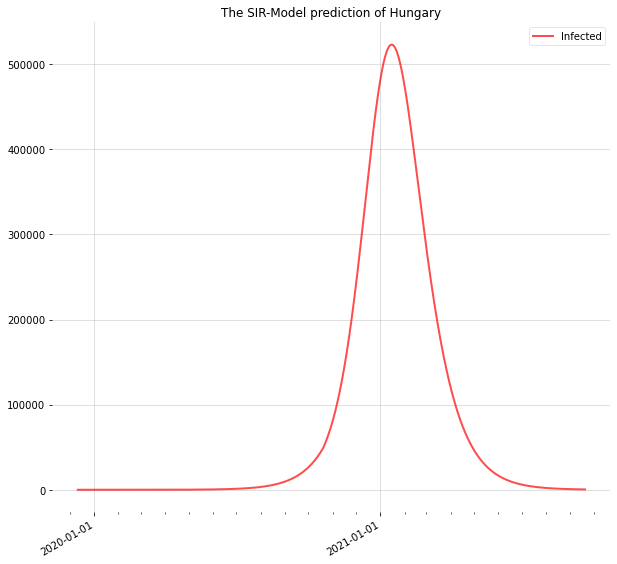

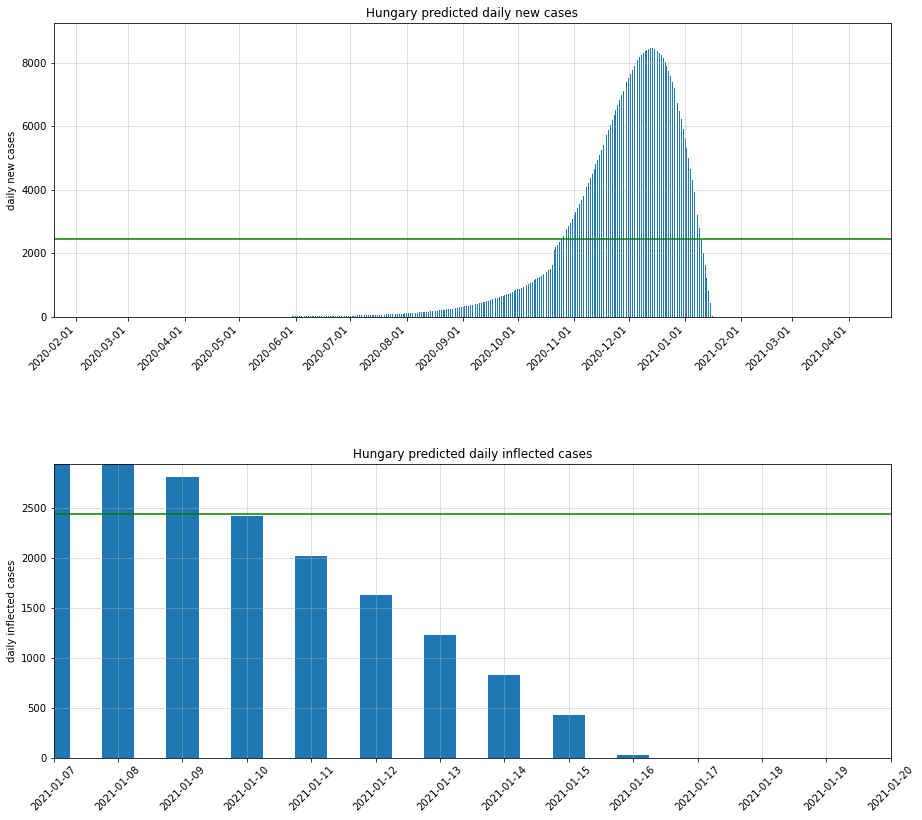

In [185]:
data_fitting_SIR ("Hungary",N_hungary,hungarian_green_list_limit, all_data.Hungary_C, 42, {"R_0_start": (1.2, 1.0, 2.0), "k": (20.0, 1.0, 100.0), "x0": (150, 100, 400), "R_0_end": (0.8, 0.5, 2.0)})


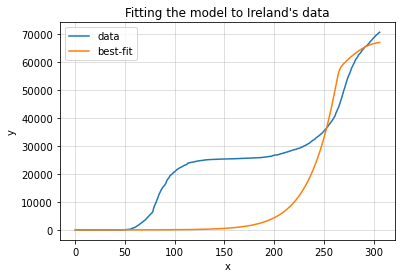

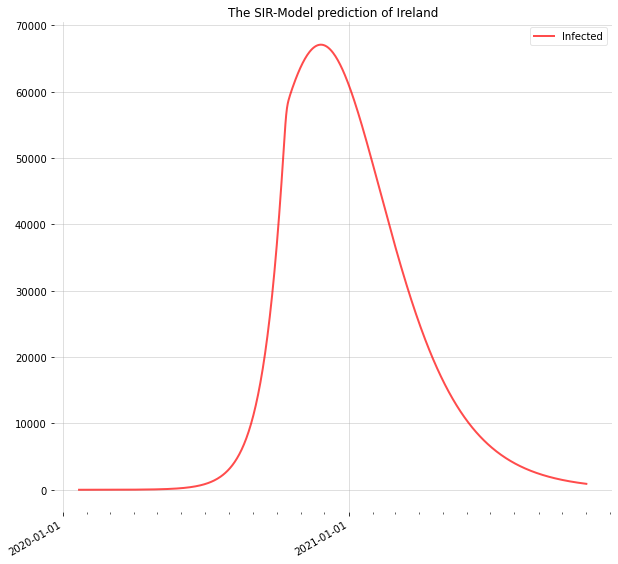

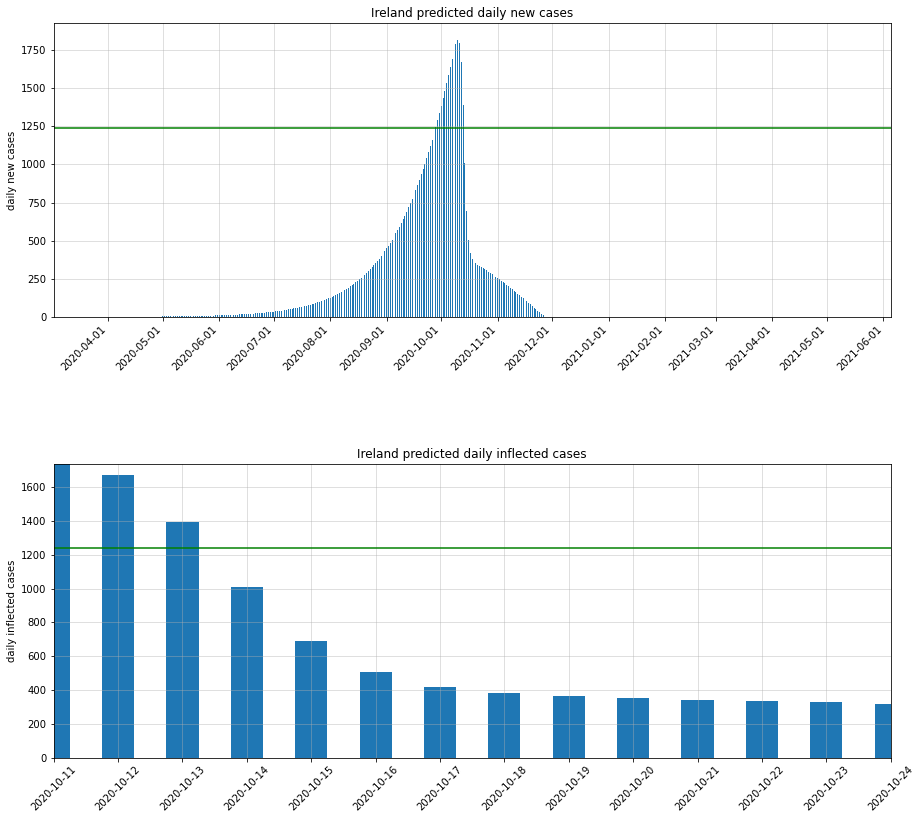

In [186]:
data_fitting_SIR ("Ireland",N_ireland,irish_green_list_limit, all_data.Ireland_C, 0, {"R_0_start": (1.5, 1.2, 2.0), "k": (40.0, 1.0, 100.0), "x0": (270, 265, 400), "R_0_end": (1.1, 0.98, 2.0)})